In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import requests
#from bs4 import BeautifulSoup
from prettytable import PrettyTable
#import geopandas as gpd

In [9]:
covid = pd.read_csv('COVID19.csv')
covid = covid.iloc[:-4]
covid.head()
#covid = covid.set_index('S. No.')

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,58.0,163.0,0.0,221.0
1,2,Andhra Pradesh,31763.0,32127.0,823.0,64713.0
2,3,Arunachal Pradesh,632.0,314.0,3.0,949.0
3,4,Assam,8675.0,18033.0,64.0,26772.0
4,5,Bihar,10506.0,19646.0,217.0,30369.0


In [10]:
#covid.head()
#covid.dtypes

#Converting All data to int
covid['Cured/Discharged/Migrated*'] = covid['Cured/Discharged/Migrated*'].map(int)
covid['Deaths**'] = covid['Deaths**'].map(int)
covid['Total Confirmed cases*'] = covid['Total Confirmed cases*'].map(int)
total = (['','Total',covid['Active Cases*'][35],covid['Cured/Discharged/Migrated*'][35],
              covid['Deaths**'][35],covid['Total Confirmed cases*'][35]])
covid = covid[:-1]
#covid

In [11]:
'''#Make a Pretty Table
table = PrettyTable()
columns = covid.columns
table.field_names = columns
for ind in list(covid.index)[:-1]:
    row = (covid['S. No.'][ind],covid['Name of State / UT'][ind],covid['Active Cases*'][ind],
           covid['Cured/Discharged/Migrated*'][ind],covid['Deaths**'][ind],covid['Total Confirmed cases*'][ind])
    table.add_row(row)
table.add_row(['','Total',covid['Active Cases*'][35],covid['Cured/Discharged/Migrated*'][35],
              covid['Deaths**'][35],covid['Total Confirmed cases*'][35]])
#table.column_width(10)
print(table)'''

"#Make a Pretty Table\ntable = PrettyTable()\ncolumns = covid.columns\ntable.field_names = columns\nfor ind in list(covid.index)[:-1]:\n    row = (covid['S. No.'][ind],covid['Name of State / UT'][ind],covid['Active Cases*'][ind],\n           covid['Cured/Discharged/Migrated*'][ind],covid['Deaths**'][ind],covid['Total Confirmed cases*'][ind])\n    table.add_row(row)\ntable.add_row(['','Total',covid['Active Cases*'][35],covid['Cured/Discharged/Migrated*'][35],\n              covid['Deaths**'][35],covid['Total Confirmed cases*'][35]])\n#table.column_width(10)\nprint(table)"

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


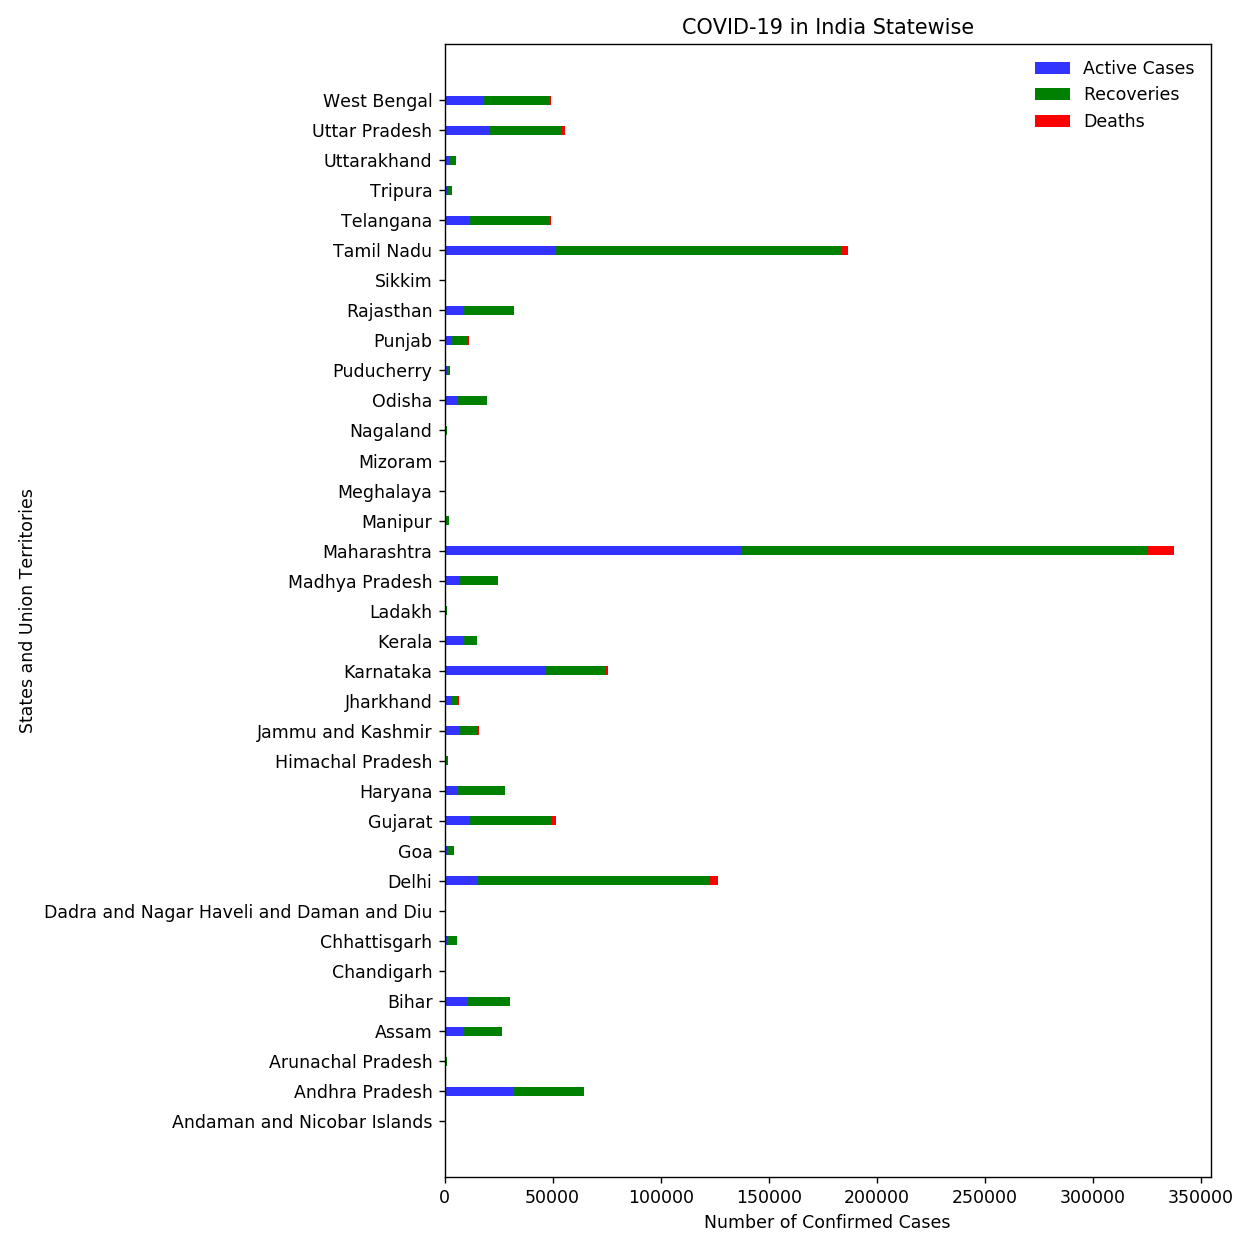

In [13]:
#Plot each state data
fig = plt.figure(figsize=(10,10))
plt.barh(covid['Name of State / UT'],covid['Active Cases*'],color='blue',height=0.3,alpha=0.8,label='Active Cases')
plt.barh(covid['Name of State / UT'],covid['Cured/Discharged/Migrated*'],color='green',height=0.3,left=covid['Active Cases*'],label='Recoveries')
plt.barh(covid['Name of State / UT'],covid['Deaths**'],color='red',height=0.3,left=covid['Active Cases*']+covid['Cured/Discharged/Migrated*'],label='Deaths')
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("States and Union Territories")
plt.title("COVID-19 in India Statewise")
plt.legend(frameon=False)
plt.tight_layout()

<IPython.core.display.Javascript object>


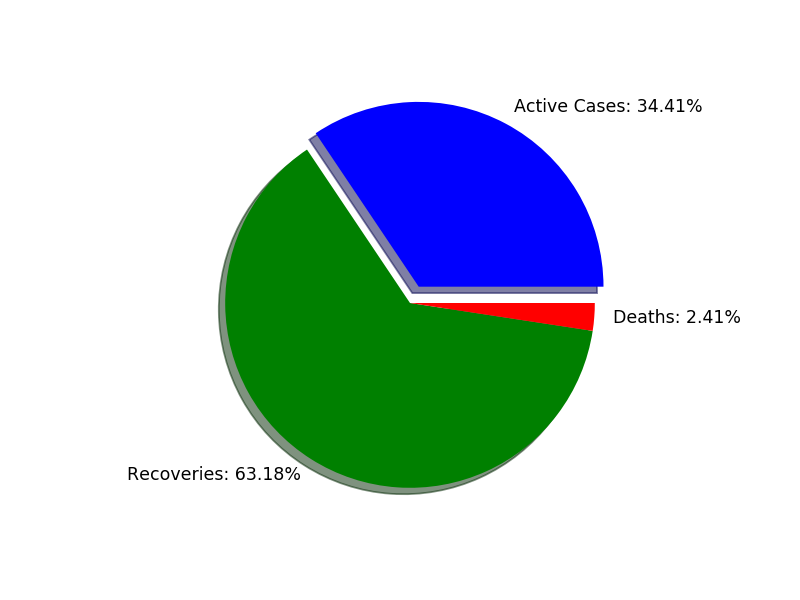

In [14]:
#Plot a pie chart for total cases
explode = [0.1,0,0]
l = [total[2]/total[5]*100.0,total[3]/total[5]*100.0,total[4]/total[5]*100.0]
l = [round(i,2) for i in l]
act = 'Active Cases: '+str(l[0])+'%'
rec = 'Recoveries: '+str(l[1])+'%'
death = 'Deaths: '+str(l[2])+'%'
labels = [act,rec,death]
#print(l)
fig2 = plt.figure()
plt.pie(l,explode=explode,shadow=True,labels=labels,colors=['b','g','r']);

In [13]:
#Plotting in the form of India Map
#map_data = gpd.read_file('Indian_States.shp')